# to overlap two simutation results
# 2025.03.04 mariusz.sapinski@psi.ch




In [5]:
import matplotlib.pyplot as plt
import pandas as pd

from platform import python_version
print("python version: ",python_version())
#matplotlib notebook
%matplotlib inline

python version:  3.13.1


In [6]:
dfN = pd.read_csv("Last_NorthStar_NIST.txt", skiprows=9)
dfG = pd.read_csv("Last_NorthStar_G4.txt", skiprows=9)

In [7]:
print(dfG)

       Time[us]        Npart0        Npart1        Npart2  MaxTemp0[K]  \
0           0.0  4.465898e+10  4.570991e+10  4.465898e+10        304.9   
1        1000.0  4.465898e+10  4.570991e+10  4.465898e+10        309.8   
2        2000.0  4.465898e+10  4.570991e+10  4.465898e+10        314.7   
3        3000.0  4.465898e+10  4.570991e+10  4.465898e+10        319.6   
4        4000.0  4.465898e+10  4.570991e+10  4.465898e+10        324.5   
...         ...           ...           ...           ...          ...   
3328  3328000.0  4.465898e+10  4.570991e+10  4.465898e+10       2076.1   
3329  3329000.0  4.465898e+10  4.570991e+10  4.465898e+10       2076.1   
3330  3330000.0  4.465898e+10  4.570991e+10  4.465898e+10       2076.1   
3331  3331000.0  4.465898e+10  4.570991e+10  4.465898e+10       2076.1   
3332  3332000.0  4.465898e+10  4.570991e+10  4.465898e+10          1.0   

      MaxTemp1[K]  MaxTemp2[K]  SEMcurr0[uA]  SEMcurr1[uA]  SEMcurr2[uA]  \
0           305.0        304.9     

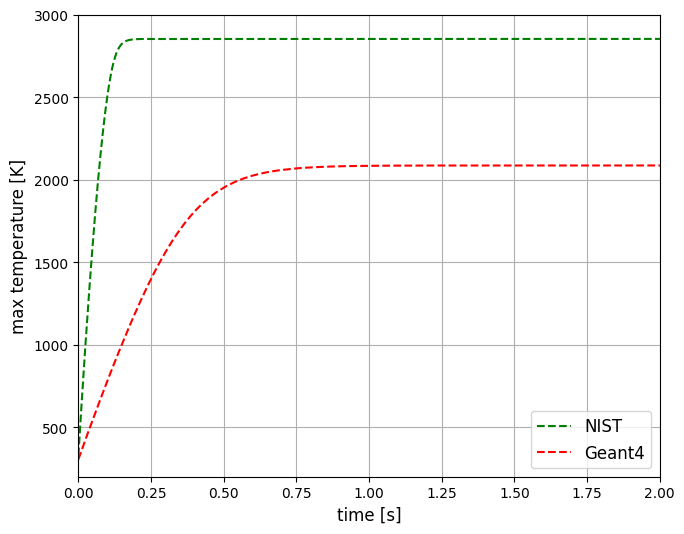

In [11]:
fig, ax = plt.subplots(1, figsize=(7.5,6))

hsimtN, = ax.plot([x/1e6 for x in dfN["Time[us]"]],dfN["MaxTemp1[K]"],'g--',label="NIST")
hsimtG, = ax.plot([x/1e6 for x in dfG["Time[us]"]],dfG["MaxTemp1[K]"],'r--',label="Geant4")

ax.set_xlabel("time [s]", fontsize=12)
ax.grid()
ax.set_ylabel("max temperature [K]", fontsize=12)
ax.set_xlim(0,2.0)
ax.set_ylim(200,3000.0)

ax.legend(fontsize=12)
plt.savefig('NISTvsGeant4.png')

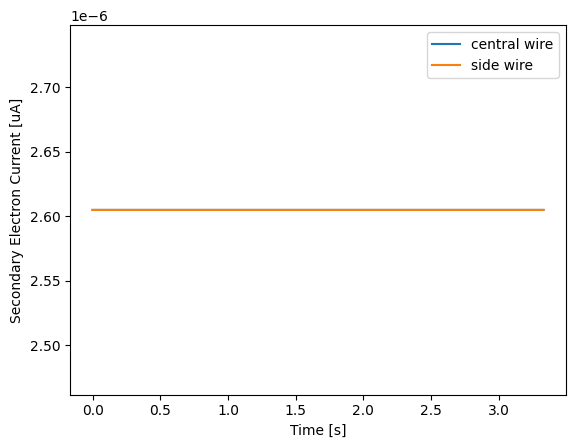

In [10]:
plt.plot([x*1e-6 for x in dfN["Time[us]"][:-1]],dfN["SEMcurr1[uA]"][:-1],label="central wire")
plt.plot([x*1e-6 for x in dfG["Time[us]"][:-1]],dfG["SEMcurr1[uA]"][:-1],label="side wire")
plt.xlabel("Time [s]")
plt.ylabel("Secondary Electron Current [uA]")
plt.legend()